In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import scipy

## Assumptions of Linear Regression

Linear regression models have the following underlying assumptions
- Linear relationship between the independent and dependent variables
- No multicollinearity between independent variables
- The errors follow a normal distribtution with mean 0
- The errors have a constant variance 
- The errors are independent of one another


How do we check these assumptions?  
For most of them, we use the residuals.

#### ... But wait!

Are 'errors' and 'residuals' the same?

<img src="img/lin-reg-model.jpeg" width="450">

What are the random and non-random components here?  

What are the known and unknown variables here?


##### Residuals 
$$y_i = \beta_0 + \beta_1X_i + \epsilon_i$$

$$\hat{y_i} = \beta_0 + \beta_1X_i$$

$$e_i = y_i - \hat{y_i}$$


Residuals are **NOT** the same as Errors

## Checking Each Assumption

### Linearity

This assumption can be checked by using scatterplots.  
We will plot the dependent variable against every independent variable.

In [15]:
df = pd.read_csv('Advertising.csv', index_col = 0 )
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


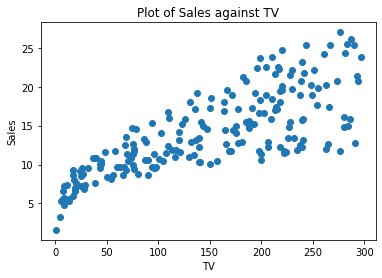

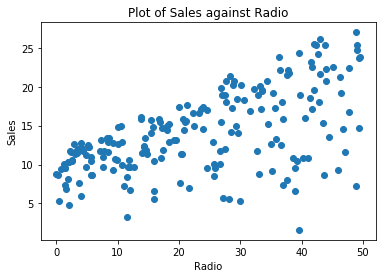

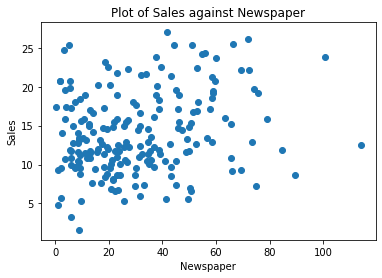

In [31]:
features = ['TV', 'Radio', 'Newspaper']

for x in features:
    plt.scatter(df[x], df['Sales'])
    plt.title('Plot of Sales against ' + x)
    plt.xlabel(x)
    plt.ylabel('Sales')
    plt.show()

A quicker solution is to use Seaborn's `pairplot`.  

This lets us check for linearity and multicollinearity at the same time.

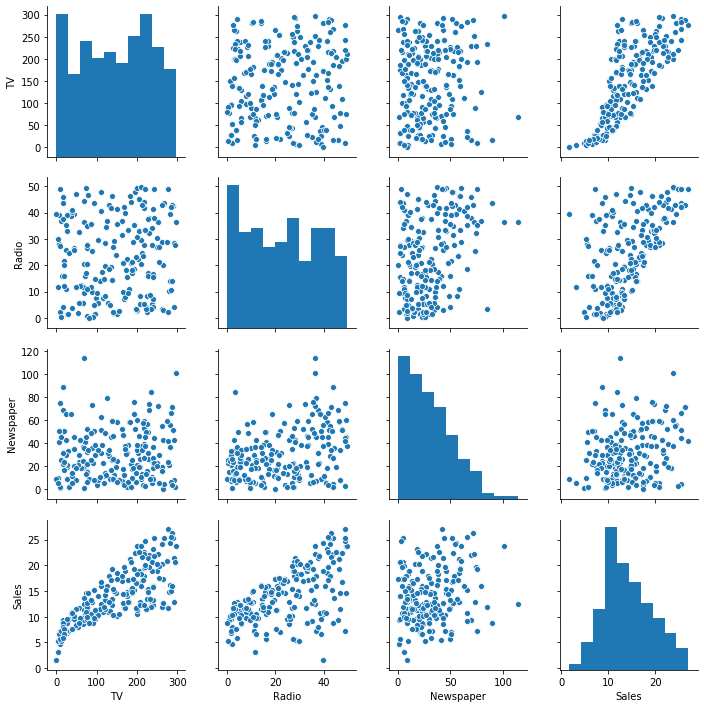

In [18]:
sns.pairplot(df)
plt.show()

## Residuals

We are concerned about the following when it comes to residuals:
- identically distributed
- not autocorrelated
- constant variance
- normally distributed

In a nutshell:

<img src="img/error-dist.jpeg" width="550">  


#### Typical Residuals vs. Fitted plots:


- **The ideal scenario**
    - Random scatter
    - Scattered around 0
    - No identifiable trend
    
    - **Fix:** Introduce polynomial terms 
    
    <img src="img/normal-resid.png" width="550">  
    
- **Non-linear relationship**
    - Clear non-linear scatter
    - No identifiable trend
    
    - **Fix:** Variable transformation
    
    <img src="img/polynomial-resid.png" width="550">

- **Autocorrelation**
    - Identifiable trend, or
    - Consecutively positive/negative residuals
    
    - **Fix:** Consider sequential analysis methods
    
    <img src="img/autocorrelation.png" width="550">

- **Heteroskedasticity**
    - The spread of residuals is different at different levels of the fitted values
    
    - **Fix:** Variable transformation (log)  
    Identify other assumption violations
    
    <img src="img/heteroskedasticity.png" width="550">

### Normality

There are several ways to test for normality.

We will go through a few measures.

1. Kolmogorov-Smirnov Test
2. Anderson-Darling Test
3. D'Agostino and Pearson Test
3. QQ Plots 

Some caveats!

- The hypothesis tests mentioned here are very sensitive and end up indicating non-normality more often.
- QQ plots do not indicate statistical significance, but are generally great tools for checking for normality.

In [25]:
# Generate data
np.random.seed(987654321)
normal_rv = scipy.stats.norm.rvs(size=100)
exponential_rv = scipy.stats.expon.rvs(loc=0, scale=1, size=100)

In [26]:
# KS Test
# What is the null here?
# Null: 
print('KS Test')
print(scipy.stats.kstest(normal_rv, 'norm'))

KS Test
KstestResult(statistic=0.058352892479417884, pvalue=0.8853119094415125)


In [27]:
# AD Test
# What is the null here?
# Null: 
print('AD Test')
print(scipy.stats.anderson(normal_rv, dist='norm'))

AD Test
AndersonResult(statistic=0.2785878261895931, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [42]:
# DP Test
# What is the null here?
# Null: 
print('DP Test')
print(scipy.stats.normaltest(normal_rv))

DP Test
NormaltestResult(statistic=1.0593751079465041, pvalue=0.5887889056959981)


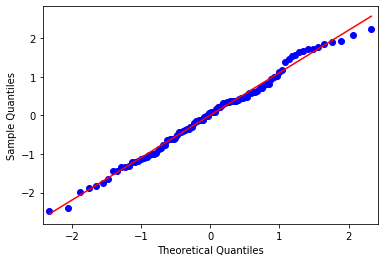

In [28]:
# QQ Plot
fig = sm.qqplot(normal_rv, line = 'r')
plt.show()

What happens if we repeat the above steps for a random variable that follows a different distribution?  

Repeat the tests for the exponential random variable.  
Can we apply all the measures for this variable?

In [34]:
## let's see the results one more time
df = pd.read_csv('Advertising.csv', index_col = 0 )
df.head()

X = df[features]
y = df.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        15:31:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

__Your Turn!__

Recall that we initially assumed that the errors should be normally distributed with mean zero and fixed variance. 

__Q:__ Find the residuals and check their distribution.

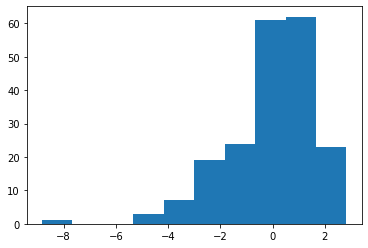

In [41]:
y_pred = res.predict(X)
residuals = res.resid
plt.hist(residuals)
plt.show()

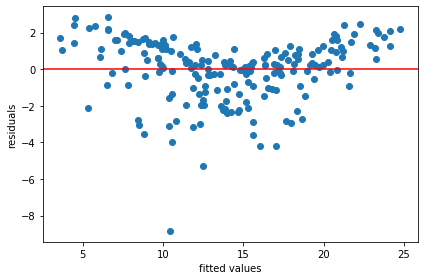

In [44]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('fitted values')

plt.ylabel('residuals')


plt.tight_layout()

## Other Potential Problems

- Outliers

    <img src='img/outliers.png' width=450>

    For more on Studentized residuals, check:

    [PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

    [Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- High Leverage Points 

    <img src='img/leverage.png' width=450>

    For more details on leverage read:

    p97 of ISLR

    [Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

    [Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

    [A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)



### Some great resources

- [Duke Stats](http://people.duke.edu/~rnau/testing.htm) 

- Page 97 of ISLR

- [Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

- Statsmodels [Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- A [blogpost](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/) with implementation
